# Mini-Project - K-Means Clustering

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Mini-Project: Support Vector Machine  
Course: Data Science - Foundations II  
COD: ND111  
Date: 20/01/2019    

***

## Table of Contents
- [Introduction](#intro)
- [Given code 1](#code1)
- [Exercise 1](#part_i_1)
- [Exercise 2](#part_i_2)
- [Exercise 3](#part_i_3)
- [Exercise 4](#part_i_4)
- [Exercise 5](#part_i_5)
- [Exercise 6](#part_i_6)

***

## General Information

This Jupyter Notebook (in Python 2) aims to create a reproducible archive.

## Introduction <a id='intro'></a>

In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

#### Given Code 1 <a id='code1'></a>

In [1]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show();

<Figure size 640x480 with 1 Axes>

In [2]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

# Importing the library of K-means from Scikit Learn
from sklearn.cluster import KMeans

# Creating the classifier.
kmeans = KMeans(n_clusters=2, random_state=0)

# Fitting/Training the data
kmeans.fit(finance_features)

#
pred = kmeans.predict(finance_features)

## Exercise 1 - Clustering Features <a id='part_i_1'></a>

The starter code can be found in k_means/k_means_cluster.py, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.

Run the code, which will create a scatterplot of the data. Think a little bit about what clusters you would expect to arise if 2 clusters are created.

>**What features will your clustering algorithm use?**

Reading the given code.

```
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
```

There are two features:

* salary
* exercised_stock_options

## Exercise 2 - Deploying Clustering <a id='part_i_2'></a>

Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. In the scatterplot that pops up, are the clusters what you expected?

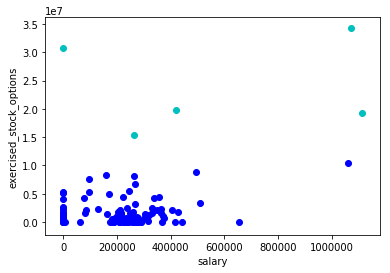

In [3]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

>**Are the clusters what you expected?**

- [ ] Yes, exactly what I expected
- [x] Roughly, but there were a few suprises
- [ ] No, but they made sense after I saw them
- [ ] No, I don't see how those clusters are right

## Exercise 3 - Clustering with 3 Features <a id='part_i_3'></a>

Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list_2 = [poi, feature_1, feature_2,feature_3]
data_2 = featureFormat(data_dict, features_list_2 )
poi_2, finance_features_2 = targetFeatureSplit( data_2 )

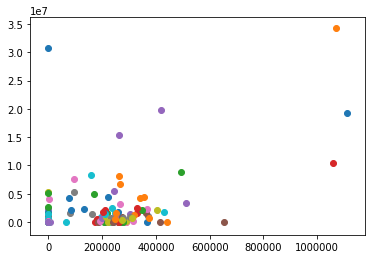

In [5]:
for f1, f2, _ in finance_features_2:
    plt.scatter( f1, f2 )
plt.show()

In [6]:
# Creating the classifier.
kmeans_2 = KMeans(n_clusters=2, random_state=0)

# Fitting/Training the data
kmeans_2.fit(finance_features_2)

#
pred_2 = kmeans_2.predict(finance_features_2)

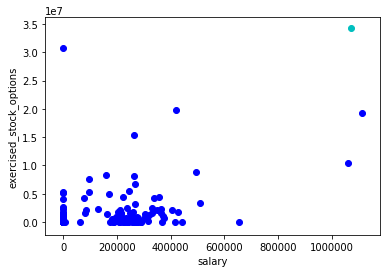

In [7]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred_2, finance_features_2, poi_2, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

## Exercise 4 - Stock Option Range <a id='part_i_4'></a>

In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [8]:
# Importing pandas
import pandas as pd

# Initializing a temporaly list.
temp = []

# Loop to gather info from the dictionay.
for index in data_dict:
    # Appending all exercised_stock_options (include NaN values)
    temp.append(data_dict[index]['exercised_stock_options'])

# Converting temp in DataFrame.
df_temp = pd.DataFrame(temp, columns = ['exercised_stock_options'])

# Subsetting. Removing all "NaN"
df_temp_clean = df_temp[df_temp.exercised_stock_options != "NaN"]

# Summary: max and min.
df_temp_clean.max()[0], df_temp_clean.min()[0]

NameError: name 'pd' is not defined

>**From querying the data dictionay, what's the maximun and minimum values taken by "exercised_stock_options"? (ignore "NaN")**

* Max: 34348384.0
* Min: 3285.0

## Exercise 5 - Salary Range <a id='part_i_5'></a>

What are the maximum and minimum values taken by “salary”?

(NB: same caveat as in the last quiz. If you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [ ]:
# Initializing the second temporaly list.
temp_2 = []

# Loop to gather info from the dictionay.
for index in data_dict:
    # Appending all exercised_stock_options (include NaN values)
    temp_2.append(data_dict[index]['salary'])

# Converting temp in DataFrame.
df_temp_2 = pd.DataFrame(temp_2, columns = ['salary'])

# Subsetting. Removing all "NaN"
df_temp_2_clean = df_temp_2[df_temp_2.salary != "NaN"]

# Summary: max and min.
df_temp_2_clean.max()[0], df_temp_2_clean.min()[0]

>**From querying the data dictionay, what's the maximun and minimum values taken by "exercised_stock_options"? (ignore "NaN")**

* Max: 1111258.0
* Min: 477.0

## Exercise 6 - Clustering Changes <a id='part_i_6'></a>

The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used two features in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?

<img src="01-img/Figure1.jpg" alt = "last_question" width="100%;">

#### Copying files

In [ ]:
# Importing shutil to deal with copy
from shutil import copyfile

# File name
filename = 'k_means_cluster.ipynb'

# Lesson
lesson = '09-Lesson_09'

# Directory to make a copy
dir_copy = '../../../ND111-Data Science Foundations II/05-Chapter05/' + lesson + '/00-Mini Project/' + filename

# Copying file.
copyfile(filename, dir_copy)